In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2012)

In [2]:
# Configure visual settings:
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.style.use(['bmh'])

In [100]:
# Load the data
data = pd.read_excel('assets/BSM_20171215.xlsx')

In [101]:
# 17,244 observations across 148 variables
data.shape

(17244, 148)

In [102]:
# Many variables are null, including some are exclusively null:
data.isnull().sum().sort_values(ascending=False).head(10)

location4.address                   17244
location4.loadingDock               17244
location4.parkingPermit             17244
location4.reservedElevatorDockID    17244
\tlocation4.elevatorTypeID          17244
drivingLeg1                         17244
location4.unitNumber\t              17244
location4.unitTypeID\t              17244
location4.buildingID\t              17244
location4.parking                   17244
dtype: int64

In [103]:
# Drop columns if all values are null:
data.dropna(axis=1, how='all', inplace=True)

In [104]:
# We've got a lot of columns, lets define a quick function
# to search column names:

def column_search(substring, df=data, notin=False):
    if notin:
        return([x for x in df.columns if substring not in x])
    return([x for x in df.columns if substring in x])
    
len(column_search('location'))

# Of the remaining 131 columns, 92 of them are related to client locations,
# with data on as many as 4 distinct locations in one move.

92

In [105]:
column_search('custom_quotes')

# The next group of columns are client-submitted info plus
# how many movers BSM has assigned to the job, what size
# truck was sent, and the ultimate cost of the job.

['custom_quotes.help_you',
 'custom_quotes.res_com',
 'custom_quotes.help_packing',
 'custom_quotes.first_choice_date',
 'custom_quotes.first_choice_time',
 'custom_quotes.second_choice_date',
 'custom_quotes.second_choice_time',
 'custom_quotes.third_choice_date',
 'custom_quotes.third_choice_time',
 'custom_quotes.boxes',
 'custom_quotes.furniture',
 'custom_quotes.reference',
 'custom_quotes.reference_category',
 'custom_quotes.mention',
 'custom_quotes.move_datetime',
 'custom_quotes.est_hours',
 'custom_quotes.stdDev',
 'custom_quotes.truck',
 'custom_quotes.num_movers',
 'custom_quotes.rate',
 'custom_quotes.travel_fee',
 'custom_quotes.min_hours']

In [106]:
column_search('driving')
# The rest of the columns are estimated details on the
# length of each driving leg. 
# Since the client does not pay for the first driving 
# leg (to the first location) that data field does not
# exist, although they may sometimes be charged a travel
# fee.

['drivingLeg2', 'drivingLeg3', 'drivingLeg4', 'drivingLeg5']

In [107]:
column_search('location', notin=True)

['custom_quotes.help_you',
 'custom_quotes.res_com',
 'custom_quotes.help_packing',
 'custom_quotes.first_choice_date',
 'custom_quotes.first_choice_time',
 'custom_quotes.second_choice_date',
 'custom_quotes.second_choice_time',
 'custom_quotes.third_choice_date',
 'custom_quotes.third_choice_time',
 'custom_quotes.boxes',
 'custom_quotes.furniture',
 'custom_quotes.reference',
 'custom_quotes.reference_category',
 'custom_quotes.mention',
 'custom_quotes.move_datetime',
 'custom_quotes.est_hours',
 'custom_quotes.stdDev',
 'custom_quotes.truck',
 'custom_quotes.num_movers',
 'custom_quotes.rate',
 'custom_quotes.travel_fee',
 'custom_quotes.min_hours',
 'actualRate',
 'cc_hours',
 'pre_move_notes',
 'estMeters1',
 'estSeconds1',
 'drivingLeg2',
 'estMeters2',
 'estSeconds2',
 'drivingLeg3',
 'estMeters3',
 'estSeconds3',
 'drivingLeg4',
 'estMeters4',
 'estSeconds4',
 'drivingLeg5',
 'estMeters5',
 'estSeconds5']

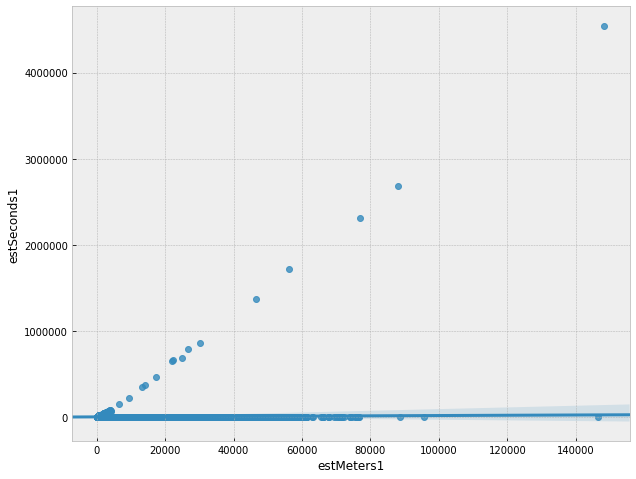

In [108]:
sns.regplot('estMeters1','estSeconds1',data)

# Something fishy going on between the length of the first driving leg
# and its duration. It appears we have a lot of unreasonably low, or null,
# values for the duration. Maybe this is a data point we have only recently begun to collect?

In [109]:
data[['location1.address','location2.address']].isnull().sum()

# We only observe 11 null values for the first address. Even labor jobs
# around the warehouse get an address for the first location.

location1.address      11
location2.address    1729
dtype: int64

In [110]:
raw_data = data

In [111]:
# Ultimately we really just want typical jobs with 1 origin
# and 1 destination:

# Drop any observations with missing fields for the first two addresses
data = raw_data 

data.dropna(subset= ['location1.address','location2.address'], how='any', inplace=True)

#

In [112]:
data = data.loc[data['location3.address'].isnull()]

In [113]:
data.dropna(axis=1, how='all', inplace=True)

C:\Users\benps\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
data.shape

(14578, 106)

In [115]:
# We only want residential jobs.

data = data[data['custom_quotes.res_com'] == 'Resid']
data.drop('custom_quotes.res_com', axis=1, inplace=True)

In [116]:
# Only jobs with a truck (not labor jobs)

data = data[data['custom_quotes.help_you'] == 'Move (with truck)']

In [117]:
data.drop('custom_quotes.help_you', axis=1, inplace=True)

In [118]:
data.drop(column_search('choice'), axis=1, inplace=True)

In [119]:
data.drop(column_search('3', df=data), axis=1, inplace=True)

In [120]:
data.drop(column_search('4', df=data), axis=1, inplace=True)

In [121]:
column_search('3', df=data)

[]

In [122]:
data.dropna(axis=1, how='all', inplace=True)

In [123]:
data.apply(pd.Series.nunique).sort_values().head(15)

# Lots of uniformative, useless columns now:

location2.parkingPermit        1
drivingLeg2                    1
location2.order                1
location1.parkingPermit        1
location1.order                1
custom_quotes.travel_fee       1
location1.geocodeResultCode    2
location2.geocodeResultCode    2
location1.state                3
location1.parkingType          4
custom_quotes.help_packing     5
custom_quotes.min_hours        5
location2.parkingType          5
location2.state                8
custom_quotes.stdDev           9
dtype: int64

In [124]:
data.drop(['location2.parkingPermit','drivingLeg2','location2.order','location1.parkingPermit','location1.order'], axis=1, inplace=True)

In [125]:
data['custom_quotes.stdDev'].value_counts()

# Not quite sure what this is. I think it has something to do with the relationship
# between estimated hours and the minimum, but it is unclear. 

# Drop it!
data.drop('custom_quotes.stdDev', axis=1, inplace=True)

In [126]:
data.iloc[500,:]

custom_quotes.help_packing                                                        Yes
custom_quotes.boxes                                                           40 - 50
custom_quotes.furniture             Queen size bed \nToddler bed\nLarge dresser \n...
custom_quotes.reference                                          you moved us before!
custom_quotes.reference_category                                      Repeat Customer
custom_quotes.mention               We would like you to pack/unpack\nWe would lik...
custom_quotes.move_datetime                                       2017-10-23 09:00:00
custom_quotes.est_hours                                                             5
custom_quotes.truck                                                                30
custom_quotes.num_movers                                                            5
custom_quotes.rate                                                                250
custom_quotes.travel_fee                              

In [127]:
data['custom_quotes.move_datetime'] = pd.to_datetime(data['custom_quotes.move_datetime'])

In [128]:
data['location1.datetime'].value_counts()

# Not an informative column.

data.drop('location1.datetime', axis=1, inplace=True)


data.drop('location2.`datetime`', axis=1, inplace=True)

In [129]:
# Ugly for loop, but thats OK:

for col in data.columns:
    if data[col].dtype == object:
        data[col].fillna('', inplace=True)
        
        

In [130]:
data.columns = data.columns.str.replace('custom_quotes.','')
data.columns = data.columns.str.replace('\t','')
data.columns = data.columns.str.replace('location','loc')

In [131]:
data['loc1.fullAddress'] = data['loc1.address'].astype(str) + ', ' + data['loc1.city'].astype(str) + ', ' + data['loc2.state'].astype(str) + ', ' + data['loc2.zipCode'].astype(str)

data['loc2.fullAddress'] = data['loc2.address'].astype(str) + ', ' + data['loc2.city'].astype(str) + ', ' + data['loc2.state'].astype(str) + ', ' + data['loc2.zipCode'].astype(str)

In [132]:
data[data['loc1.geocodedAddress'] == ''].shape

(4571, 56)

### Labelling Trucks

In [140]:
data['truck'].fillna(32, inplace=True)

In [142]:
truck_df = pd.read_csv('assets/trucks.csv', index_col=0)
truck_df.drop('\t', axis=0, inplace=True)

In [143]:
truck_df = truck_df.set_index(truck_df.index.astype(int))

In [152]:
data['truck_type'] = [truck_df.loc[i,'truck_type'] for i in data['truck']]

In [153]:
data['truck'] = [truck_df.loc[i,'truck_name'] for i in data['truck']]

In [155]:
data['truck_type'].value_counts()

Little    8276
Big       3738
NAT         31
Name: truck_type, dtype: int64

In [157]:
assert data.shape[0] == 12045

In [158]:
data.to_csv('assets/clean_data.csv')

In [159]:
data.to_pickle('assets/clean_data.p')